# Sberbank Russian Housing Market

Eğitim verileri Ağustos 2011'den Haziran 2015'e, test seti ise Temmuz 2015'ten Mayıs 2016'ya kadar olan dönemi kapsıyor. Veri seti ayrıca Rusya ekonomisi ve finans sektöründeki genel koşullar hakkında da bilgi içeriyor<p>
Amacımız her bir mülkün satış fiyatını tahmin etmektir.

<img src="https://www.kaggle.com/competitions/6392/images/header">

<a href="https://www.kaggle.com/competitions/sberbank-russian-housing-market/data">Dataya Buradan Erişebilirsiniz</a>

### EDA

In [1]:
import pandas as pd

pd.set_option("display.max_columns",300)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.sample(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [4]:
df.shape

(30471, 292)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [6]:
missing_counts = df.isnull().sum()

# Boş veri olan sütunları ve sayılarını filtreleme
missing_columns = missing_counts[missing_counts > 0]

print("Boş verileri olan sütunlar ve sayıları:")
print(missing_columns)

Boş verileri olan sütunlar ve sayıları:
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
preschool_quota                           6688
school_quota                              6685
hospital_beds_raion                      14441
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_foam                          4991
build_count_slag                          4991
build_count_mix     

In [7]:
# Object tipindeki sütunları seçme
object_columns = df.select_dtypes(include=['object']).columns

print("Object tipindeki sütunlar:")
print(object_columns)

Object tipindeki sütunlar:
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


### Future Engineering

In [8]:
d={"no":0,"yes":1}

In [9]:
df[["culture_objects_top_25", "thermal_power_plant_raion", "incineration_raion", 
    "oil_chemistry_raion", "radiation_raion", "railroad_terminal_raion",
    "big_market_raion", "nuclear_reactor_raion", "detention_facility_raion", 
    "water_1line", "big_road1_1line", "railroad_1line"]] = df[["culture_objects_top_25", 
    "thermal_power_plant_raion", "incineration_raion", "oil_chemistry_raion", 
    "radiation_raion", "railroad_terminal_raion", "big_market_raion", 
    "nuclear_reactor_raion", "detention_facility_raion", "water_1line", 
    "big_road1_1line", "railroad_1line"]].replace(d)

In [10]:
# Bos verileri ortalama ile doldurdum
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Sadece sayısal sütunlar için
        df[column].fillna(df[column].mean(), inplace=True)

In [11]:
#df=df.dropna()

In [12]:
missing_counts = df.isnull().sum()

# Boş veri olan sütunları ve sayılarını filtreleme
missing_columns = missing_counts[missing_counts > 0]

print("Boş verileri olan sütunlar ve sayıları:")
print(missing_columns)

Boş verileri olan sütunlar ve sayıları:
Series([], dtype: int64)


In [13]:
# Object tipindeki sütunları seçme
object_columns = df.select_dtypes(include=['object']).columns

print("Object tipindeki sütunlar:")
print(object_columns)

Object tipindeki sütunlar:
Index(['timestamp', 'product_type', 'sub_area', 'ecology'], dtype='object')


In [14]:
df=df.drop(["timestamp","id"],axis=1)

In [15]:
df=pd.get_dummies(df,drop_first=True)

In [16]:
x=df.drop("price_doc",axis=1)
y=df["price_doc"]

### Modelling

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [18]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,6.961999e-01,2.549828e+06,1.438066e+06
XGBRegressor,6.845728e-01,2.598164e+06,1.375292e+06
ElasticNet,4.350418e-01,3.477163e+06,1.964872e+06
Ridge,4.305605e-01,3.490927e+06,2.010101e+06
Linear,4.302280e-01,3.491946e+06,2.014803e+06
Lasso,4.283620e-01,3.497659e+06,2.015229e+06
Extra Tree,4.043861e-01,3.570256e+06,1.864615e+06
Decision Tree,3.540782e-01,3.717979e+06,1.806153e+06
AdaBoost,3.247200e-01,3.801534e+06,2.126914e+06
mlp_regressor,1.931429e-01,4.155423e+06,2.545465e+06


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [23]:
GBR=GradientBoostingRegressor()

In [24]:
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [25]:
thmn=GBR.predict(x_test)

In [26]:
r2_score(y_test,thmn)

0.6965568657813062

In [27]:
mean_squared_error(y_test,thmn)**.5

2548329.5877665468

In [28]:
residuals=y_test-thmn

<Axes: xlabel='price_doc', ylabel='Count'>

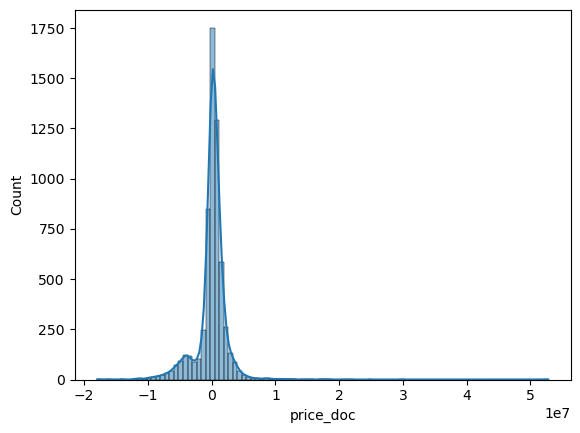

In [29]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='price_doc', ylabel='Density'>

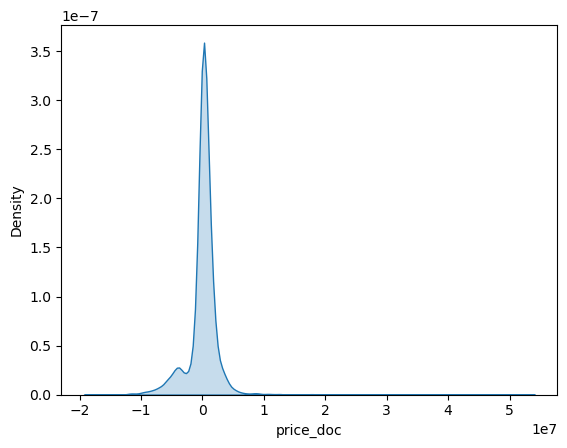

In [30]:
sns.kdeplot(residuals, fill=True)

### Deep Learning

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
from sklearn.preprocessing import normalize, scale

In [77]:
x=df.drop("price_doc",axis=1)
y=df["price_doc"]

In [34]:
x=scale(x) # hepsini aynı birime getirdik

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [36]:
model=Sequential()
model.add(Dense(664,activation="relu")) 
model.add(Dense(448,activation="relu")) 
model.add(Dense(332,activation="relu")) 
model.add(Dense(224,activation="relu")) 
model.add(Dense(196,activation="relu")) 
model.add(Dense(148,activation="relu")) 
model.add(Dense(128,activation="relu")) 
model.add(Dense(96,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1, activation='linear'))
model.compile(loss="mse", optimizer="adam") 
                                         

In [37]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=1500, verbose=1)

Epoch 1/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 48010213982208.0000 - val_loss: 12740904091648.0000
Epoch 2/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 22653163274240.0000 - val_loss: 11753859579904.0000
Epoch 3/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 14213388959744.0000 - val_loss: 12516288626688.0000
Epoch 4/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 16055398301696.0000 - val_loss: 11495931904000.0000
Epoch 5/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 13976515641344.0000 - val_loss: 11483862794240.0000
Epoch 6/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 12165971968000.0000 - val_loss: 11662463598592.0000
Epoch 7/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 14977296498688.0000 - val_loss: 11884880199680.0000
Epoch 8/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12387241426944.0000 - val_loss: 12035406430208.0000
Epoch 9/1500
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11724887425024.000

In [38]:
tahmin=model.predict(x_test)

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
r2_score(tahmin,y_test)

0.4851316064517823

In [40]:
mean_squared_error(tahmin,y_test)**.5

2855815.688825686

In [41]:
loss_f=pd.DataFrame(history.history)

<Axes: >

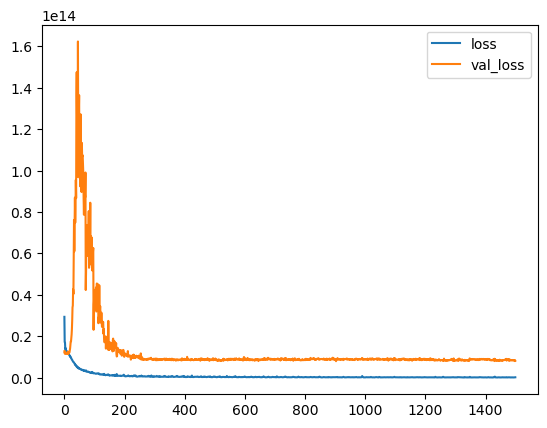

In [42]:
loss_f.plot()

#### test verisi

In [81]:
test=pd.read_csv("test.csv")

In [82]:
d={"no":0,"yes":1}

In [83]:
test[["culture_objects_top_25", "thermal_power_plant_raion", "incineration_raion", 
    "oil_chemistry_raion", "radiation_raion", "railroad_terminal_raion",
    "big_market_raion", "nuclear_reactor_raion", "detention_facility_raion", 
    "water_1line", "big_road1_1line", "railroad_1line"]] = test[["culture_objects_top_25", 
    "thermal_power_plant_raion", "incineration_raion", "oil_chemistry_raion", 
    "radiation_raion", "railroad_terminal_raion", "big_market_raion", 
    "nuclear_reactor_raion", "detention_facility_raion", "water_1line", 
    "big_road1_1line", "railroad_1line"]].replace(d)

In [84]:
#test=test.dropna()

In [85]:
# Bos verileri ortalama ile doldurdum
for column in test.columns:
    if test[column].dtype in ['float64', 'int64']:  # Sadece sayısal sütunlar için
        test[column].fillna(test[column].mean(), inplace=True)

In [86]:
id = test["id"].values 

In [87]:
test=test.drop(["timestamp","id"],axis=1)

In [88]:
test=pd.get_dummies(test,drop_first=True)

In [89]:
# DataFrame'lerin sütun isimlerini alma
columns_df1 = set(test.columns)
columns_df2 = set(x.columns)

# Ortak olmayan sütunları bulma
unique_to_df1 = columns_df1 - columns_df2
unique_to_df2 = columns_df2 - columns_df1

# Sonuçları yazdırma
print("Sadece df1'de bulunan sütunlar:", unique_to_df1)
print("Sadece df2'de bulunan sütunlar:", unique_to_df2)

Sadece df1'de bulunan sütunlar: set()
Sadece df2'de bulunan sütunlar: {'sub_area_Poselenie Klenovskoe'}


In [90]:
test["sub_area_Poselenie Klenovskoe"]=0

In [91]:
guess=model.predict(test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [92]:
testah = pd.DataFrame({"id":id})

In [93]:
testah["price_doc"]=guess

In [94]:
testah.to_csv("tahmin2.csv",index=False)

Sonuc olarak verimizi isleyip modelimizi once ML sonra da DL kullanarak egittik. En son da test verisini yukleyip modelimize tahmin ettirdik.